The candidate shall develop a technology for a specific spam detection, based on the provenance and content of the email. An email shall be treated as spam when it comes from a mail domain (smtp sender) that is classified as spamming, or it contains a set of terms that are referrable to spam. The training phase shall deliver a model of spam that is compatible with the above specifications. 

The training set of the process can be found on https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv and can be implemented either:

- by using a naive Bayes classifier; 

- or by using a FFNN;

- or by using an MLP with two layers.

The technology is to be implemented by using either NLTK with Python or OpenNLP with Java. The solution shall be valued based on the correctness, completeness and consistency of the solution implemented. For the evaluation, we shall consider confusion matrix, with specific emphasis on the F1 measure.

Overall, students shall deliver the solution via GitHub. On accessing the solution we value it by anti-cheating technologies, and therefore it will not be considered acceptable when more than 60% of the code is not original. Along with the solution, please upload also the confusion matrix and some analysis on the effectiveness. No value shall be given to solution strength. If a solution is not at the state-of-the-art, we consider it fine in any case, provided it comes along with the above characteristics.

### Steps that we are going to follow: 

* Import Libraries.
* Load the dataset.
* Ploting the data.
* Prepare the Data for NLTK.
* Split the Data into Training and Test Sets.
* Train the Naive Bayes Classifier.
* Test the model.
* Evaluate the Classifier.
* Check the result.

### Step 1: **Import Libraries**

In [ ]:
# Importing necessary libraries
import numpy as np        # For numerical operations
import pandas as pd       # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
%matplotlib inline

# Importing WordCloud for text visualization
from wordcloud import WordCloud

# Importing NLTK for natural language processing
import nltk
from nltk.corpus import stopwords    # For stopwords

# Already downloaded the data
# Downloading NLTK data 
# nltk.download('stopwords')   # Downloading stopwords data
# nltk.download('punkt')       # Downloading tokenizer data

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/silvergjeka/Desktop/NLP/SpamClassifier...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/silvergjeka/Desktop/NLP/SpamClassifier...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:
# Step 1: Importing the libraries.

import nltk
import pandas as pd
from nltk.classify import NaiveBayesClassifier as nbc
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix


In [20]:
# Step 2: Load the dataset
data_set = pd.read_csv('emails.csv')

# Step 4: Print all columns
print(data_set.columns)


Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)


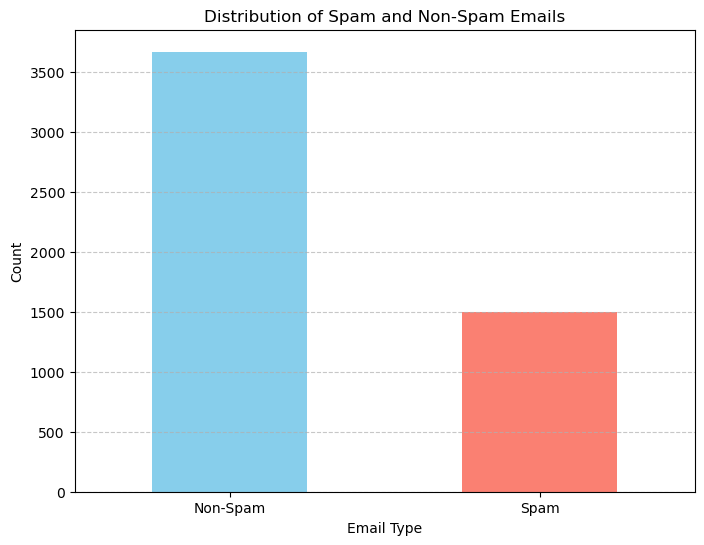

In [21]:
# Step 3: Plotting spam and non-spam emails
import matplotlib.pyplot as plt

def plot_distribution(data_set):
    counts = data_set['Prediction'].value_counts() # Count spam,non-spam emails
    
    # start plotting
    plt.figure(figsize=(8, 6))
    counts.plot(kind='bar', color=['skyblue', 'salmon'])
    plt.title("Distribution of Spam and Non-Spam Emails")
    plt.xlabel("Email Type")
    plt.ylabel("Count")
    plt.xticks(ticks=[0, 1], labels=["Non-Spam", "Spam"], rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_distribution(data_set)


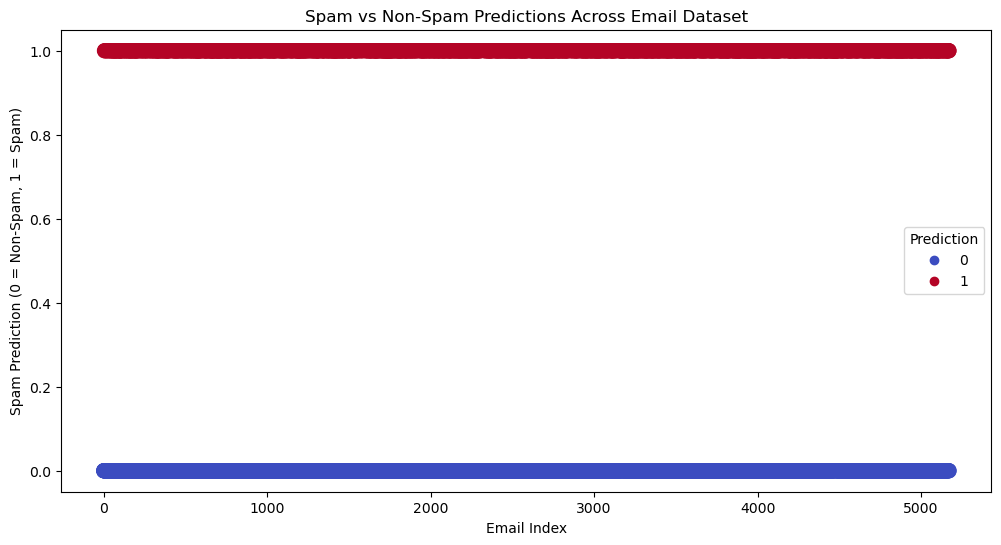

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Create jitter to visualize overlapping points
#jitter = np.random.normal(0, 0.1, len(data_set))  # Add small random noise for better visualization

fig, ax = plt.subplots(figsize=(12, 6))

# Create scatter plot with added jitter
scatter = ax.scatter(
    x=np.arange(len(data_set)),  # Email indices on x-axis
    y=data_set['Prediction'], #+ jitter,  # Predictions with jitter to show distribution
    c=data_set['Prediction'],  # Coloring based on the prediction
    cmap='coolwarm',
    s=100,
);

# Set title, xlabel, ylabel, and legend
ax.set(
    title="Spam vs Non-Spam Predictions Across Email Dataset",
    xlabel="Email Index",
    ylabel="Spam Prediction (0 = Non-Spam, 1 = Spam)"
);

# Add a legend
ax.legend(*scatter.legend_elements(), title="Prediction");


In [ ]:
# Step 4: Prepare the data:
def prepare_data(data_set):
    if 'Prediction' not in data_set.columns:
        raise ValueError("Dataset must have a 'Prediction' column.")
    feature_dicts = data_set.drop(columns=['Prediction']).to_dict(orient='records')
    labels = data_set['Prediction'].tolist()
    return list(zip(feature_dicts, labels))


data = prepare_data(data_set)

[({'Email No.': 'Email 1', 'the': 0, 'to': 0, 'ect': 1, 'and': 0, 'for': 0, 'of': 0, 'a': 2, 'you': 0, 'hou': 0, 'in': 0, 'on': 0, 'is': 1, 'this': 0, 'enron': 0, 'i': 2, 'be': 0, 'that': 0, 'will': 0, 'have': 0, 'with': 0, 'your': 0, 'at': 0, 'we': 0, 's': 3, 'are': 0, 'it': 0, 'by': 0, 'com': 0, 'as': 1, 'from': 0, 'gas': 0, 'or': 0, 'not': 0, 'me': 0, 'deal': 0, 'if': 0, 'meter': 0, 'hpl': 0, 'please': 0, 're': 2, 'e': 4, 'any': 0, 'our': 0, 'corp': 0, 'can': 0, 'd': 0, 'all': 0, 'has': 0, 'was': 0, 'know': 0, 'need': 0, 'an': 0, 'forwarded': 0, 'new': 0, 't': 4, 'may': 0, 'up': 0, 'j': 1, 'mmbtu': 0, 'should': 0, 'do': 0, 'am': 0, 'get': 0, 'out': 0, 'see': 0, 'no': 0, 'there': 0, 'price': 0, 'daren': 0, 'but': 0, 'been': 0, 'company': 0, 'l': 0, 'these': 0, 'let': 0, 'so': 0, 'would': 0, 'm': 2, 'into': 0, 'xls': 0, 'farmer': 0, 'attached': 0, 'us': 0, 'information': 0, 'they': 0, 'message': 0, 'day': 0, 'time': 0, 'my': 0, 'one': 0, 'what': 0, 'only': 0, 'http': 0, 'th': 0, 'volu

In [ ]:
# Step 5: Split the data 80% for training and 20% for testing.
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
# Step 6: Train the model.
model = nbc.train(train_data)

In [ ]:
# Step 7: Test the model.
predictions = []
true_labels = []
for i in range(len(test_data)):
    true_labels.append(test_data[i][1])
    predictions.append(model.classify(test_data[i][0]))

# print the confusion matrix
print(confusion_matrix(true_labels, predictions))

print(predictions[:5])

[[702  37]
 [ 75 221]]
[0, 0, 1, 0, 0]


In [ ]:
# Step 8: Evaluate the model.
accuracy = nltk.classify.util.accuracy(model, test_data)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Preapre the test data for the evaluation
X_test = [feacture for feacture, _ in test_data]
y_test = [label for _, label in test_data]

# Predict the lables using the model
y_pred = [model.classify(feacture) for feacture in X_test]

# Print the f1_score
f1 = f1_score(y_test, y_pred)
print("F1 Score: {:.2f}".format(f1))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 89.18%
F1 Score: 0.80
[[702  37]
 [ 75 221]]


### FFNN

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score

# Load the dataset
data_set = pd.read_csv('emails.csv')  # Ensure the dataset contains 'Prediction' as the target column

# Preprocess and prepare the data
def prepare_data(data):
    """
    Prepares the dataset for model training:
    - Removes irrelevant columns
    - Converts features to numeric values while handling missing data
    """
    if 'Email No.' in data.columns:
        data = data.drop(columns=['Email No.'])  # Drop identifier column, not useful for modeling

    if 'Prediction' not in data.columns:
        raise ValueError("The dataset must include a 'Prediction' column.")

    # Convert features to numeric and handle invalid/missing data
    X = data.drop(columns=['Prediction']).apply(pd.to_numeric, errors='coerce').fillna(0).values
    y = data['Prediction'].values

    return X, y

X, y = prepare_data(data_set)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Build and train the neural network
model = MLPClassifier(
    hidden_layer_sizes=(128,),  # Single layer with 128 neurons based on prior experiments
    max_iter=300,               # Increased for convergence; experimentally validated
    random_state=42,
    solver='adam'               # Adam optimizer is efficient for this problem size
)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

# Evaluation metrics
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")


Confusion Matrix: [[727  12]
 [  8 288]]
F1 Score: 0.97
Accuracy: 98.07%


### MLP

In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score

# Load and inspect dataset
data_set = pd.read_csv('emails.csv')  # Dataset must include 'Prediction' for target values

# Custom data preparation for MLP
def prepare_data(data):
    """
    Cleans and preprocesses the dataset for model training.
    - Removes irrelevant identifier columns
    - Converts features to numeric values to avoid errors during model training
    """
    if 'Email No.' in data.columns:
        data = data.drop(columns=['Email No.'])  # Identifier removed, not relevant to predictions
    
    if 'Prediction' not in data.columns:
        raise ValueError("Expected 'Prediction' column in dataset for supervised learning.")

    # Specific numeric conversion for feature columns
    feature_cols = data.drop(columns=['Prediction']).columns
    X = data[feature_cols].apply(pd.to_numeric, errors='coerce').fillna(0).values
    y = data['Prediction'].values

    return X, y

X, y = prepare_data(data_set)

# Train-test split with reproducible random seed
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Multi-layer perceptron configuration
model = MLPClassifier(
    hidden_layer_sizes=(128, 64),  # Balanced architecture for this dataset
    max_iter=300,                  # Enough iterations to reach convergence without overfitting
    random_state=42,
    solver='adam'                  # Adam optimizer is efficient for neural networks
)

# Model training
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")


Confusion Matrix:
[[722  17]
 [  7 289]]
F1 Score: 0.96
Accuracy: 97.68%
